# Problem 2: Is the random module actually random?

We check if NumPy’s random module generates values that appear to be random.

If the model is random, we should get integers selected from a range at random approximately equally often.
Use the code below to generate an array of 1,000,000 random integers from 0 to 99.

`import numpy as np`

`numbers = np.random.randint(100, size=1000000)`

Then complete the following tasks.
1. Make a properly formatted histogram of the number of times each value appears.
2. Discuss in detail how often you expect each value to appear, how often each value
actually appeared, and whether the distribution over the results matches what you would
expect according to the Central Limit Theorem.
3. Optional challenge: Derive (analytically) a 95% confidence interval of the mean count of
1,000,000 randomly selected integers from 0 to 99 that equal a particular value. Explain
how many of your 100 histogram values should fall within this confidence interval. Count
how many of your 100 histogram values do actually fall within this confidence interval.
Compare and comment on the results.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import collections

In [ ]:
numbers = np.random.randint(100, size=1000000)

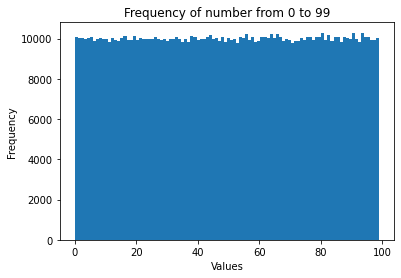

In [ ]:
plt.hist(numbers,  bins = 100)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Frequency of number from 0 to 99")
plt.show()

In [ ]:
numbers

array([56, 23, 79, ..., 85, 59, 44])

In [ ]:
exp_freq = 1000000/100
freq_dic = collections.Counter(numbers)
freqs = list(freq_dic.values())

mean_freq = np.mean(freqs)
std_freq = np.std(freqs)


In [ ]:
print(f'Expected frequency: {exp_freq}')
print(f'Actual frequency mean: {mean_freq}. Actual frequency variance: {round(std_freq,2)}.')

Expected frequency: 10000.0
Actual frequency mean: 10000.0. Actual frequency variance: 106.26.


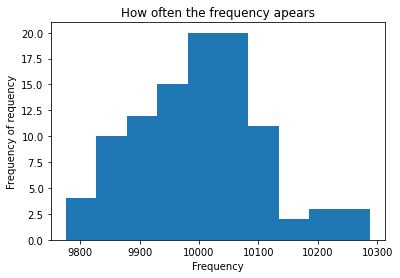

In [ ]:
plt.hist(freqs)
plt.xlabel("Frequency")
plt.ylabel("Frequency of requency")
plt.title("How often the frequency apears")
plt.show()

#Problem 4: Wireworld simulation

In [13]:
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import matplotlib.colors
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from tqdm import tqdm
import copy

In [23]:
class Wireworld: 
    '''
    Wireworld simulation

    Parameters
    ----------
    initial_setup: string
        The initial wire setup
    

    Attributes
    ----------
    current_frame: list[list[int]]
        The current frame of the simulation
    rows: int
        The width of the simulation space
    cols: int
        The height of the simulation space
    fig, axes: matplotlib.subplot
        The figure and its corresponding axes
    '''        
    def __init__(self, initial_setup):           
        self.current_frame = initial_setup
        self.rows = len(self.current_frame)
        self.cols = len(self.current_frame[0])
        self.figure, self.axes = plt.subplots()

    def update_neighbors(self, x,y, last_frame):
        '''
        Update the state of a single cell 

        Parameters
        ----------
        x: int
            position x of the input cell 
        y: int 
            position y of the input cell 
        last_frame: list 
            configeration of the previous frame 

        Returns
        ----------
        None
        '''
        # print("initial setup", x, y)
        if self.current_frame[x][y] == 0: 
            self.current_frame[x][y] = 0
        elif self.current_frame[x][y] == 1: 
            self.current_frame[x][y] = 2
        elif self.current_frame[x][y] == 2: 
            self.current_frame[x][y] = 3
        elif self.current_frame[x][y] == 3: 
            head_count = 0 
            for dx in range(-1, 2):
                for dy in range(-1, 2):
                    # print("x+dx, y+dy", x+dx, y+dy)
                    # print("dx, dy", dx, dy)
                    if (x + dx < 0) or (x + dx >= self.rows) or (y + dy < 0) or (y + dy >= self.cols):
                        # print("not running dx, dy", dx, dy)
                        continue                    
                    if last_frame[x+dx][y+dy] == 1: 
                        # print("add headcount")
                        # print("x+dx, y+dy", x+dx, y+dy)
                        head_count += 1
            # print("position", x, y, "head_count", head_count)
            if (head_count == 1) or (head_count == 2): 
                # print("convert", x, y, "value",self.initial_setup[x][y])
                self.current_frame[x][y] = 1
    
    def update_frame(self): 
        '''
        Update the state of the entire frame 

        Parameters
        ----------
        None 

        Returns
        ----------
        None
        '''
        last_frame = copy.deepcopy(self.current_frame)
        for x in range(self.rows):
            for y in range(self.cols):
                self.update_neighbors(x, y, last_frame)

    
    def create_visualization(self):
        '''
        Create a visualization plot of the state

        Parameters
        ----------
        None

        Returns
        ----------
        plot
            The plot of the current wireworld state
        '''
        # fig, axes = plt.subplots()
        cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black","blue","red","yellow"])
        plot = self.axes.pcolor(self.current_frame, cmap = cmap)
        # plot = axes.pcolor(self.initial_setup, cmap = cmap)
        plt.show()
        return plot


In [24]:
def animate(simulation, total_frames = 100, interval = 200):
    """
    Create a animation from the simulation
    """
    def update(i):
        simulation.update_frame()
        return [simulation.create_visualization()]
    animated_sim = animation.FuncAnimation(simulation.figure, update, 
                                           init_func=lambda: [], 
                                           frames=total_frames, interval=interval)
    output = HTML(animated_sim.to_html5_video())
    simulation.figure.clf()
    return output

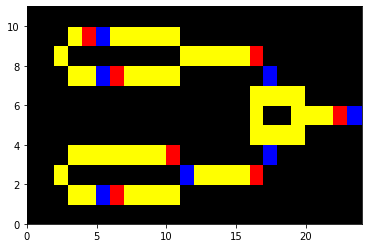

In [25]:

initial_setup = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 3, 2, 1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 2, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 3, 3, 1, 2, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 2, 1],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0],
                 [0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                 [0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 3, 3, 2, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 3, 3, 1, 2, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
                 ]
initial_setup.reverse()
wireworld = Wireworld(initial_setup)
wireworld.create_visualization()

In [26]:
animate(wireworld)

Make animation code is adapted from: [Class code](https://sle-collaboration.minervaproject.com/?id=d2b778a9-a0f2-49b5-8c69-76b25b973f8d&userId=9994&name=Esther+Yang&avatar=https%3A//s3.amazonaws.com/picasso.fixtures/Yung-Hsuan_Yang_9994_2022-10-01T20%3A30%3A04.724Z&noPresence=1&readOnly=1&isInstructor=0&signature=d877d2140b8ebae809cbe1039465cd82946214f4f3b571c397a541f6c5c50094)

